In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [3]:
master_df = pd.read_csv('master.csv')
master_df2 = pd.read_csv('master2.csv')


columns_master_df = master_df.columns
columns_master_df2 = master_df2.columns

# Find columns in master_df2 that are not in master_df
extra_columns = columns_master_df2.difference(columns_master_df)
print(extra_columns)


Index(['full_moon_indicator', 'is_holiday'], dtype='object')


In [4]:
# Get column names of master_df and master_df2
columns_master_df = master_df.columns
columns_master_df2 = master_df2.columns

# Find columns in master_df that are not in master_df2
extra_columns = columns_master_df.difference(columns_master_df2)
print(extra_columns)


Index(['Unnamed: 0'], dtype='object')


In [5]:
master_df = pd.read_csv('master2.csv')


# Assuming master_df contains your data and 'Date' is a datetime column
data = master_df.copy()
####!!!!
# duplicate_dates = data[data.duplicated(subset=['Date'], keep=False)]

# if duplicate_dates.empty:
#     print("No repeat dates found.")
# else:
#     print("Repeat dates found:")
#     print(duplicate_dates)

# data


In [6]:

# # Create a DataFrame with all dates between 01/01/2010 and 2/24/2024
# start_date = pd.to_datetime('01/01/2010')
# end_date = pd.to_datetime('2/24/2024')
# all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
# all_dates_df = pd.DataFrame({'Date': all_dates})

# # Assuming you have another DataFrame df with the "Date" column
# # Make sure the "Date" column in df is in datetime format
# # df['Date'] = pd.to_datetime(df['Date'])

# # Find the missing dates
# missing_dates = all_dates_df[~all_dates_df['Date'].isin(data['Date'])]

# print("Missing Dates:")
# print(missing_dates)

In [7]:
columns_to_check =['Day of Week', 'feelslikemax', 'feelslikemin', 'precip', 'snowdepth', 
          'windgust', 'windspeed', 'solarradiation', 'solarenergy', 
          'uvindex', 'moonphase', 'Holiday', 'cloudcover']

# Count the number of missing values in each column
missing_values_count = data[columns_to_check].isna().sum()
data['Holiday'].fillna('non-holiday', inplace=True)

# data.dropna(subset=columns_to_check, inplace=True)
data
missing_values_count





Day of Week          0
feelslikemax         0
feelslikemin         0
precip               0
snowdepth            0
windgust           284
windspeed            0
solarradiation       0
solarenergy          0
uvindex              0
moonphase            0
Holiday           4958
cloudcover           0
dtype: int64

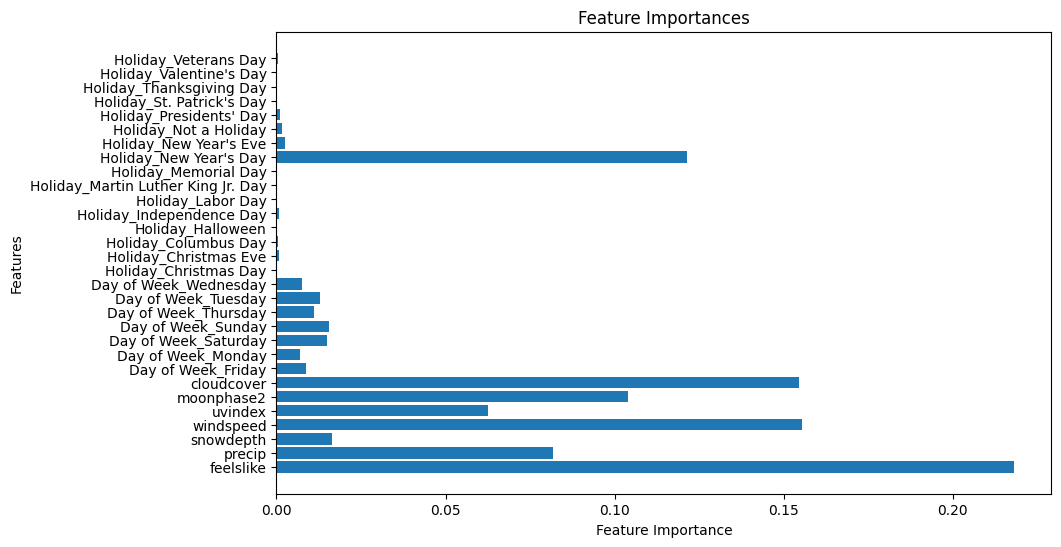

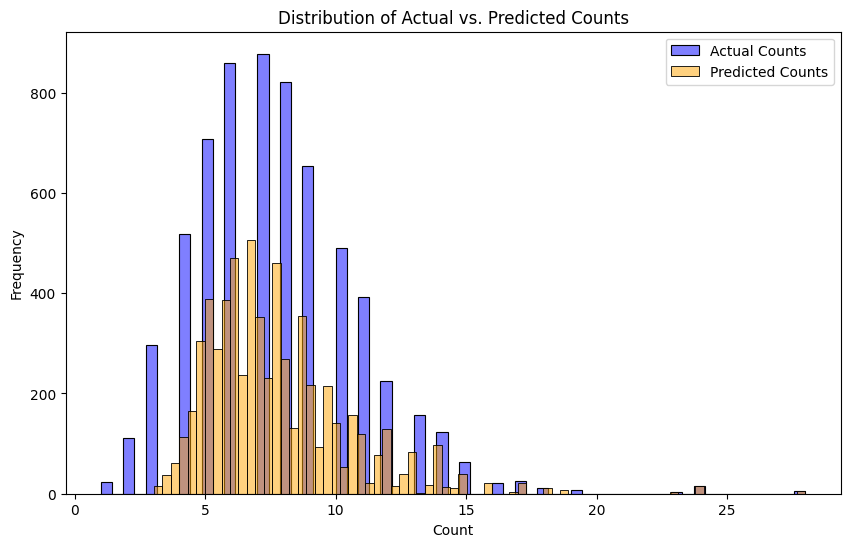

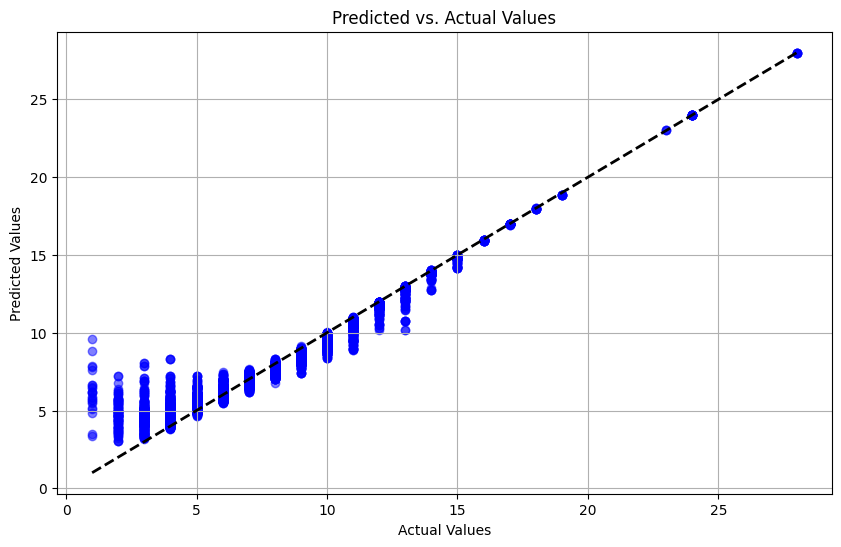

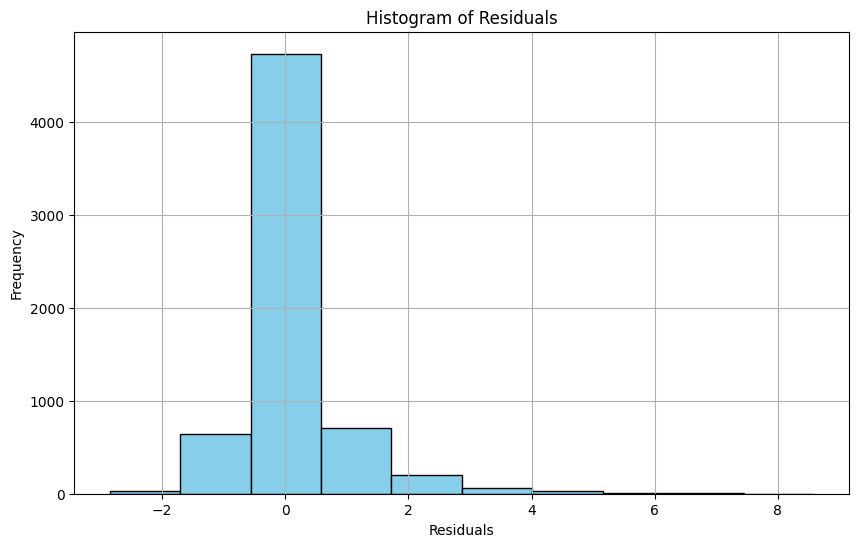

In [18]:
# Drop unnecessary columns and missing values if needed
# data.dropna(inplace=True)  # Uncomment this line if you have missing values and want to drop them
data['moonphase2'] = abs(data['moonphase'] - 0.5)

# Split data into features (X) and target variable (y)
X = data[['Day of Week', 'feelslike', 'precip', 'snowdepth', 'windspeed', 
          'uvindex', 'moonphase2', 'Holiday', 'cloudcover']]
y = data['count']

X = pd.get_dummies(X)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest model
rf = RandomForestRegressor(n_estimators=500,max_depth=20, min_samples_leaf=2, min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

# Get predicted counts
y_pred = rf.predict(X_test)

# Plot feature importances
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Grid Search
# param_grid = {
#     'n_estimators': [50,100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     # 'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create the Random Forest Regressor model
# rf_model = RandomForestRegressor(random_state=42)

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score (MSE):", -best_score)

# # Alternatively, you can use Randomized Search
# # Define the parameter distributions for Randomized Search
# param_dist = {
#     'n_estimators': [50,100,150],
#     'max_depth': [None] + list(range(5, 31, 5)),
#     'min_samples_split': [10,20],
#     'min_samples_leaf': [1, 2, 4],
#     # 'max_features': ['auto', 'sqrt', 'log2']
# }

# # Perform Randomized Search with cross-validation
# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
# random_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score (MSE):", -best_score)

mse = mean_squared_error(y_test, y_pred)
mse
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual Counts')
sns.histplot(y_pred, color='orange', alpha=0.5, label='Predicted Counts')
plt.title('Distribution of Actual vs. Predicted Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
residuals = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.hist(residuals, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
mse

0.7157344336079757

Scratch part 2

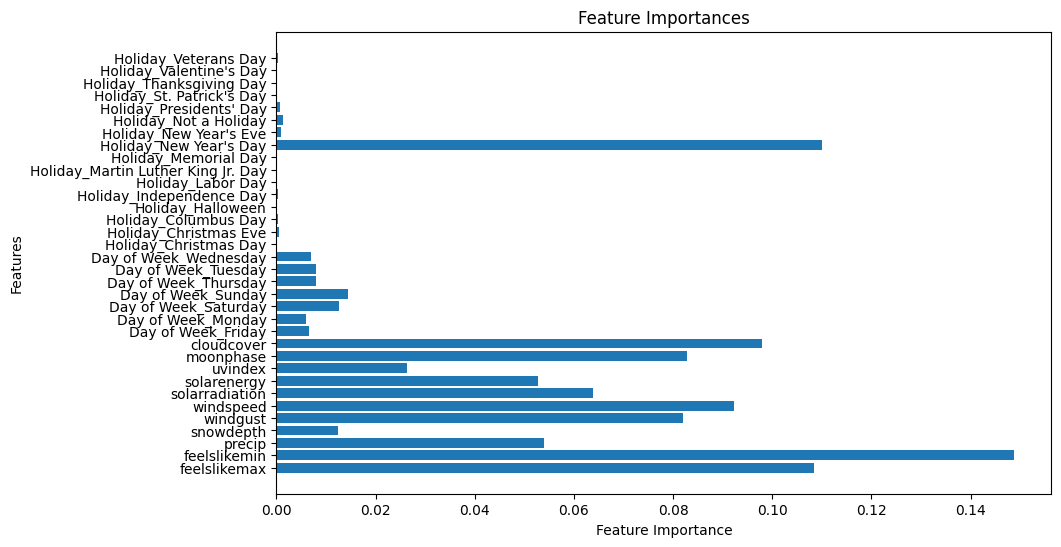

In [9]:


master_df = pd.read_csv('master.csv')
# Assuming master_df contains your data and 'Date' is a datetime column
data = master_df.copy()

# Drop unnecessary columns and missing values if needed
# data.dropna(inplace=True)  # Uncomment this line if you have missing values and want to drop them

# Split data into features (X) and target variable (y)
X = data[['Day of Week', 'feelslikemax', 'feelslikemin', 'precip', 'snowdepth', 
          'windgust', 'windspeed', 'solarradiation', 'solarenergy', 
          'uvindex', 'moonphase', 'Holiday', 'cloudcover']]
y = data['count']

X = pd.get_dummies(X)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest model
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

# Get predicted counts
y_pred = rf.predict(X_test)

# Plot feature importances
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()